In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import pickle
import sys
sys.path.append("../src/")
from lbd_functions import (printtimelog, plot_summary_stats_level_0, compute_err, 
plot_clay_and_sand_ecdfs_err,plot3sections,plot3Dreal,plot_spatial_prop)


In [2]:
fgw = 15 # figure width in cm
fts = 8 # font size

real_num = 0 # 0,1 and 2
filename_suffix = "_real_"+str(real_num)
figDir = '../figures/'

output_fd = '../data/boreholes-processed/'

df_classified_log_fn = output_fd+'LBW_extended_STRATA_LOG_corrected_classified.csv'
# classification_fn = output_fd+'LBW_extended_STRATA_corrected_classification.csv'
ref_err_fn = output_fd+'LBW_extended_corrected_error-tolerance.pickle'
spatial_prop_fn = output_fd+'spatial-proportions-corrected.csv'

calib_model_file = '../data/models-age-facies/calibrated_model'+filename_suffix+'.npz'

ndhsamples = 500
seed = 12345

In [3]:
printtimelog('load LBD 1-point statistics')
f = open(ref_err_fn, 'rb')
[_, _, _,
 _, _, _,
 _, _, _, _, thickness_lim,
 _, _, _] = pickle.load(f)
f.close()


26-Feb-2025 (09:48:03) - load LBD 1-point statistics


26-Feb-2025 (09:48:03) - load ../data/boreholes-processed/LBW_extended_STRATA_LOG_corrected_classified.csv


C:\Users\00102908\my-UWA\LBD-facies-modeling\notebooks\../src\lbd_functions.py:717: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Intermediate','\n Coarse-grained','Fine-grained'])


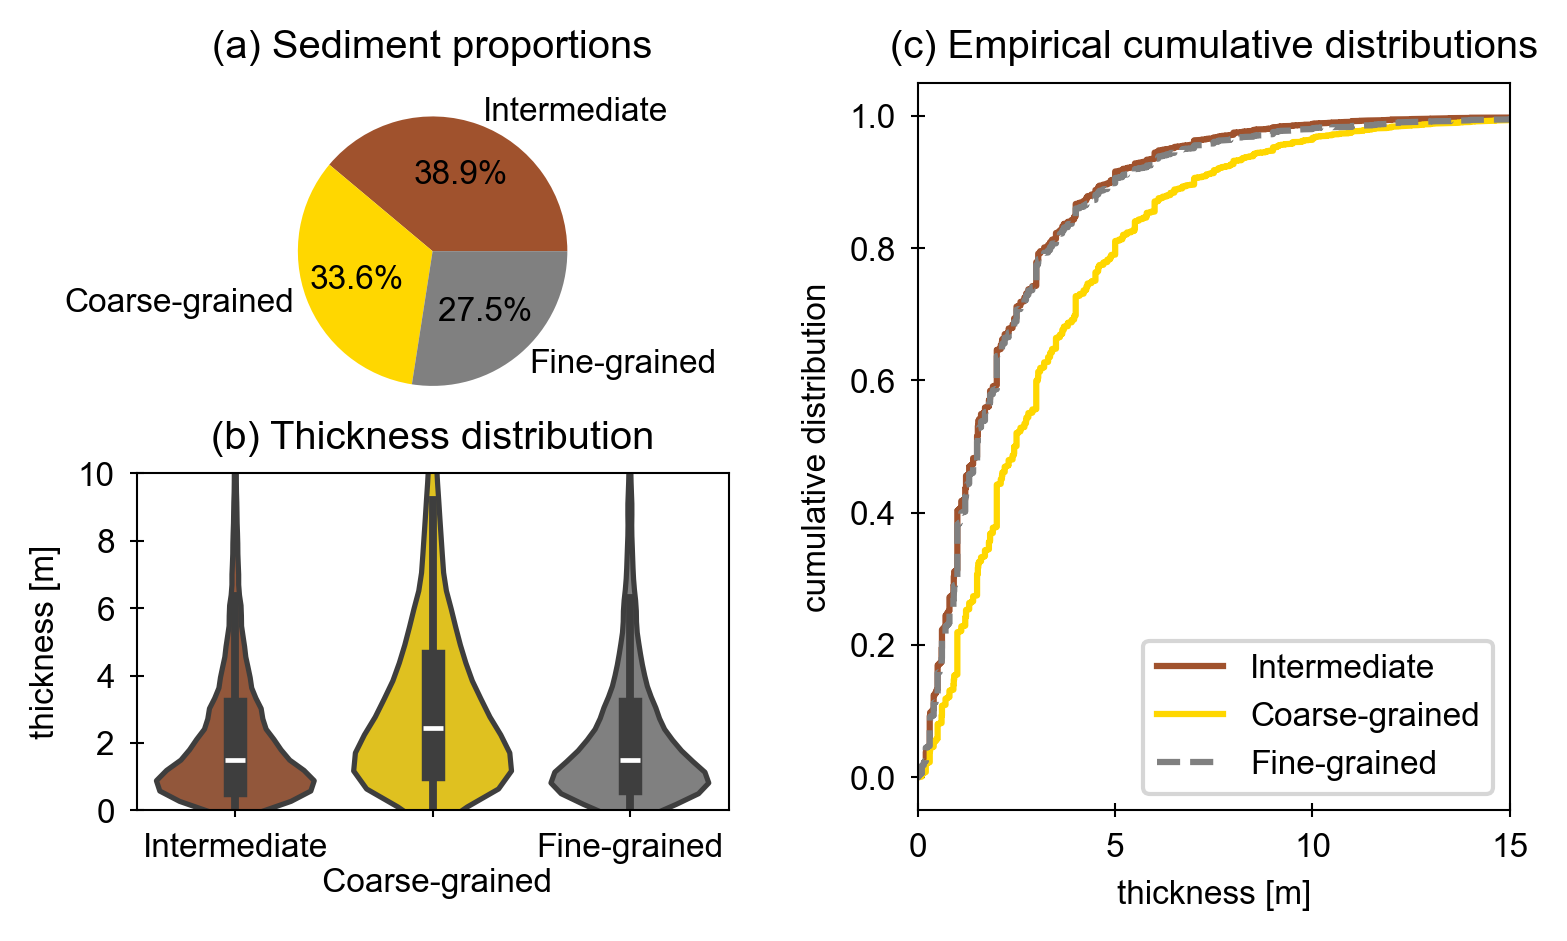

26-Feb-2025 (09:48:05) - Figure saved to ../figures/fig5_level_0_stats_15cm_ft8.png


In [4]:
printtimelog('load '+df_classified_log_fn)
df_processed_log3 = pd.read_csv(df_classified_log_fn) # for violin plot

figFileName = figDir+'fig5_level_0_stats_'+str(fgw)+'cm_ft'+str(fts)+'.png'
plot_summary_stats_level_0(df_processed_log3,thickness_lim,figsize=(fgw/2.54,fgw/15*8/2.54),fontsize=fts,figFileName=figFileName)
printtimelog('Figure saved to '+figFileName)

In [5]:
printtimelog('load '+calib_model_file)
npzfile = np.load(calib_model_file)
# sorted(npzfile.files)

facies_mx = npzfile['facies_mx']
labels = npzfile['labels']
lithocodes = npzfile['lithocodes']
mask_aquifer = npzfile['mask_aquifer']
relative_youth_mx = npzfile['relative_youth_mx']
vx = npzfile['vx']
vy = npzfile['vy']
vz = npzfile['vz']

26-Feb-2025 (09:48:05) - load ../data/models-age-facies/calibrated_model_real_0.npz


26-Feb-2025 (09:48:05) - Compute errors between reference and real 0
errors: [0.01119775 0.00358375 0.02192014 0.01784411]
dist2lbd: 0.013660904139986996
../figures/fig7_thickness_ecdf_err_real_0_15cm_ft8.png


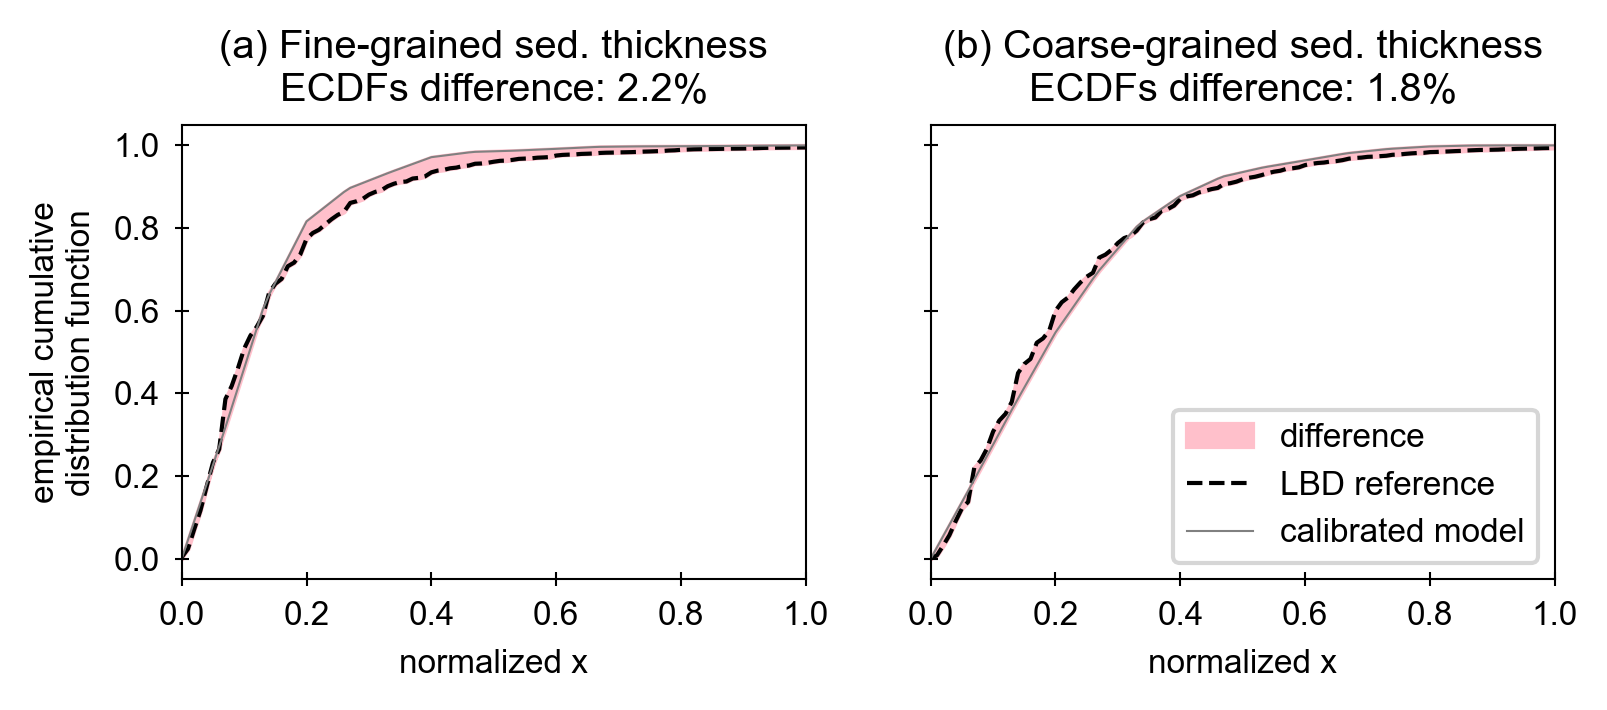

In [6]:
printtimelog('Compute errors between reference and real '+str(real_num))
x01_vec,ecdf01_clay,ecdf01_sand,ecdf_clay_ref,ecdf_sand_ref,facies_mx,relative_youth_mx,lithocolors,vx,vy,vz = compute_err(
    ref_err_fn,calib_model_file,ndhsamples,seed+real_num)

figFileName = figDir+'fig7_thickness_ecdf_err'+filename_suffix+'_'+str(fgw)+'cm_ft'+str(fts)+'.png'
print(figFileName)
plot_clay_and_sand_ecdfs_err(ecdf_clay_ref,ecdf_sand_ref,x01_vec,ecdf01_clay,ecdf01_sand,
                             figsize=(fgw/2.54,fgw/15*5/2.54),fontsize=fts,figFileName=figFileName)

In [7]:
lithocolors

array(['pink', 'lavenderblush', 'sienna', 'gold', 'grey'], dtype='<U13')

26-Feb-2025 (09:48:06) - plotting sections - facies
../figures/fig8_3Dmodel_facies_real_0_15cm_ft8.png


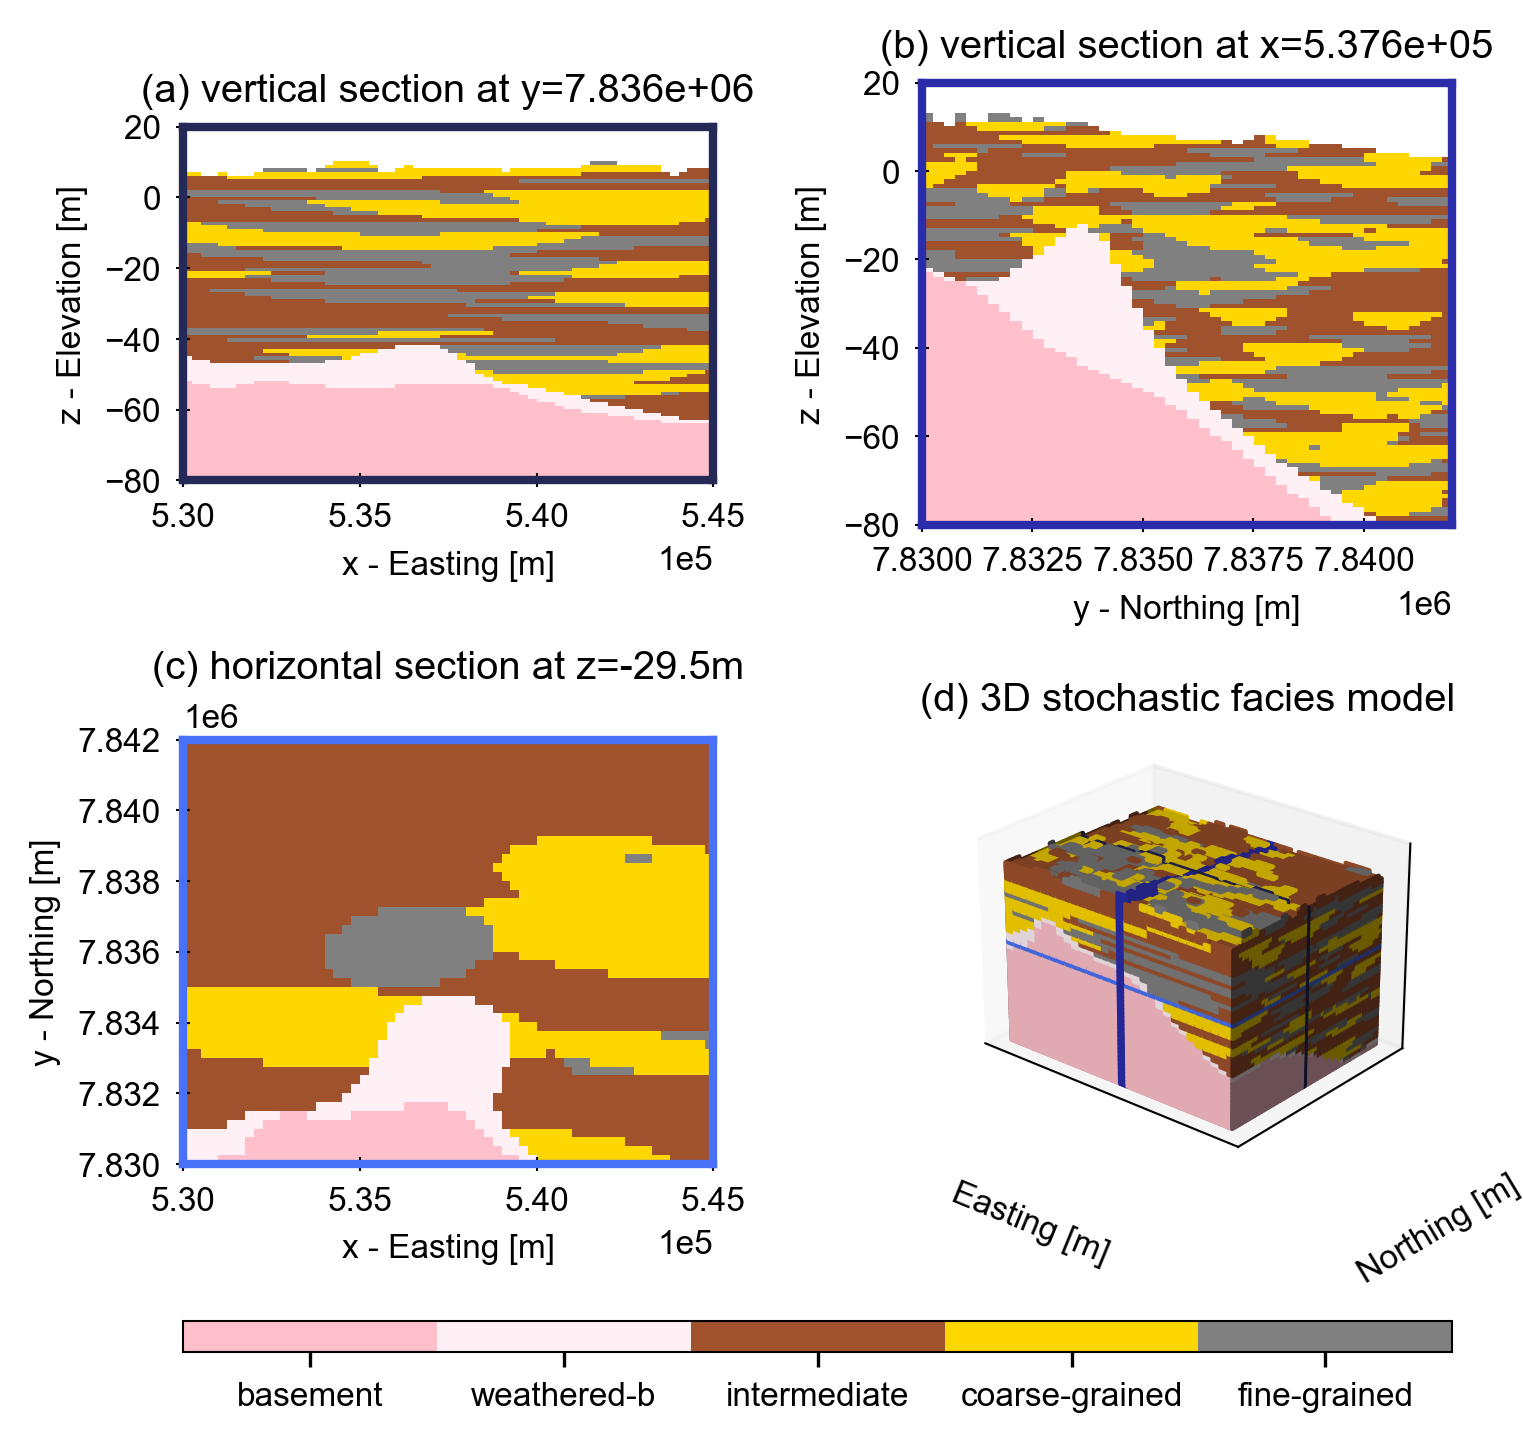

In [8]:
printtimelog('plotting sections - facies')
# check plot of sections
cmap = ListedColormap(lithocolors) # lavenderblush
ix,iy,iz=30,22,50
# FACIES PLOT
figFileName = figDir+'fig8_3Dmodel_facies'+filename_suffix+'_'+str(fgw)+'cm_ft'+str(fts)+'.png'
print(figFileName)
plot3sections(facies_mx,ix,iy,iz,cmap,vx,vy,vz,labeltype='facies',
              figsize=(fgw/2.54,fgw/15*12/2.54),fontsize=fts,figFileName=figFileName) #

26-Feb-2025 (09:48:15) - plotting sections - age
../figures/fig9_3Dmodel_age_real_0_15cm_ft8.png


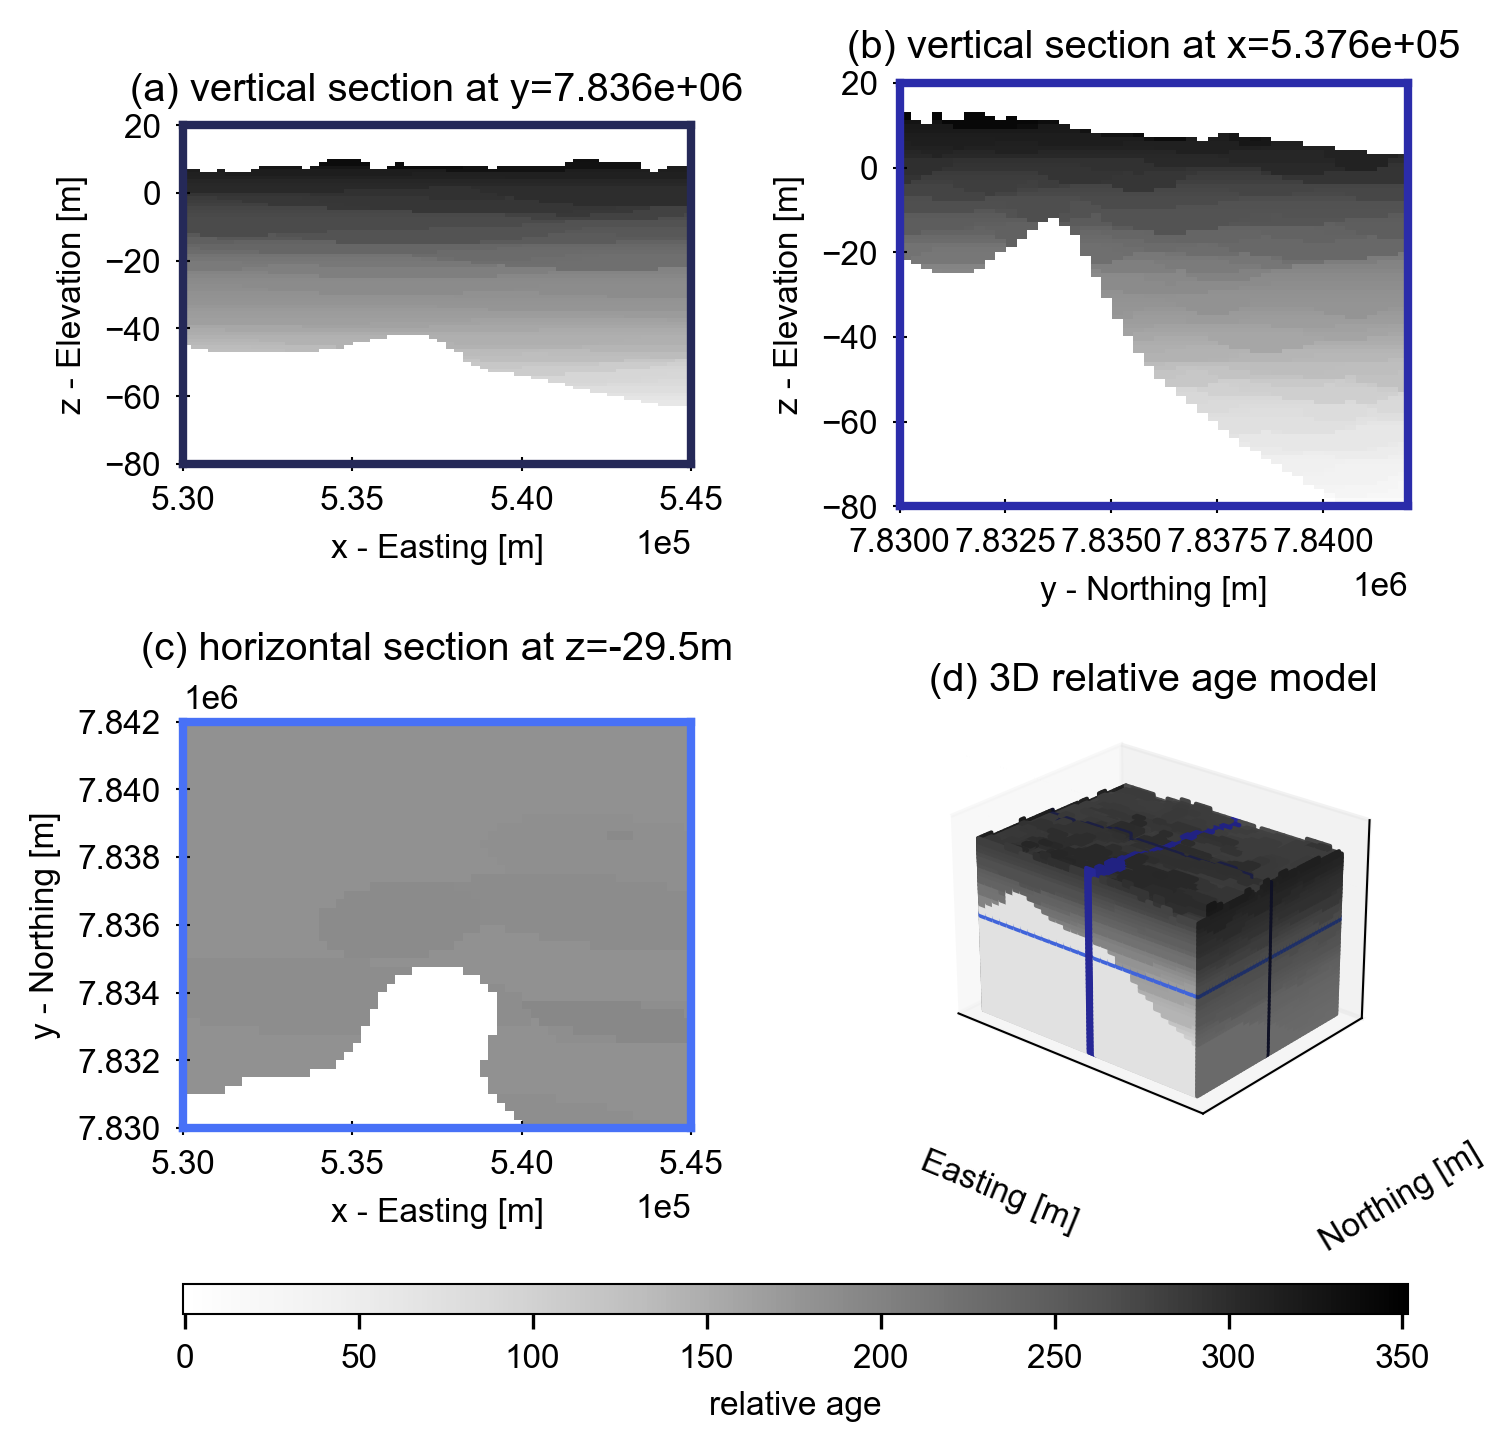

In [9]:
printtimelog('plotting sections - age')
# YOUTH PLOT (-AGE)
figFileName = figDir+'fig9_3Dmodel_age'+filename_suffix+'_'+str(fgw)+'cm_ft'+str(fts)+'.png'
print(figFileName)
plot3sections(relative_youth_mx,ix,iy,iz,'Greys',vx,vy,vz,labeltype='age',
              figsize=(fgw/2.54,fgw/15*12/2.54),fontsize=fts,figFileName=figFileName) #


26-Feb-2025 (09:48:24) - plotting 3D view only
../figures/fig1_3Dmodel_facies_real_0_15cm_ft8.png


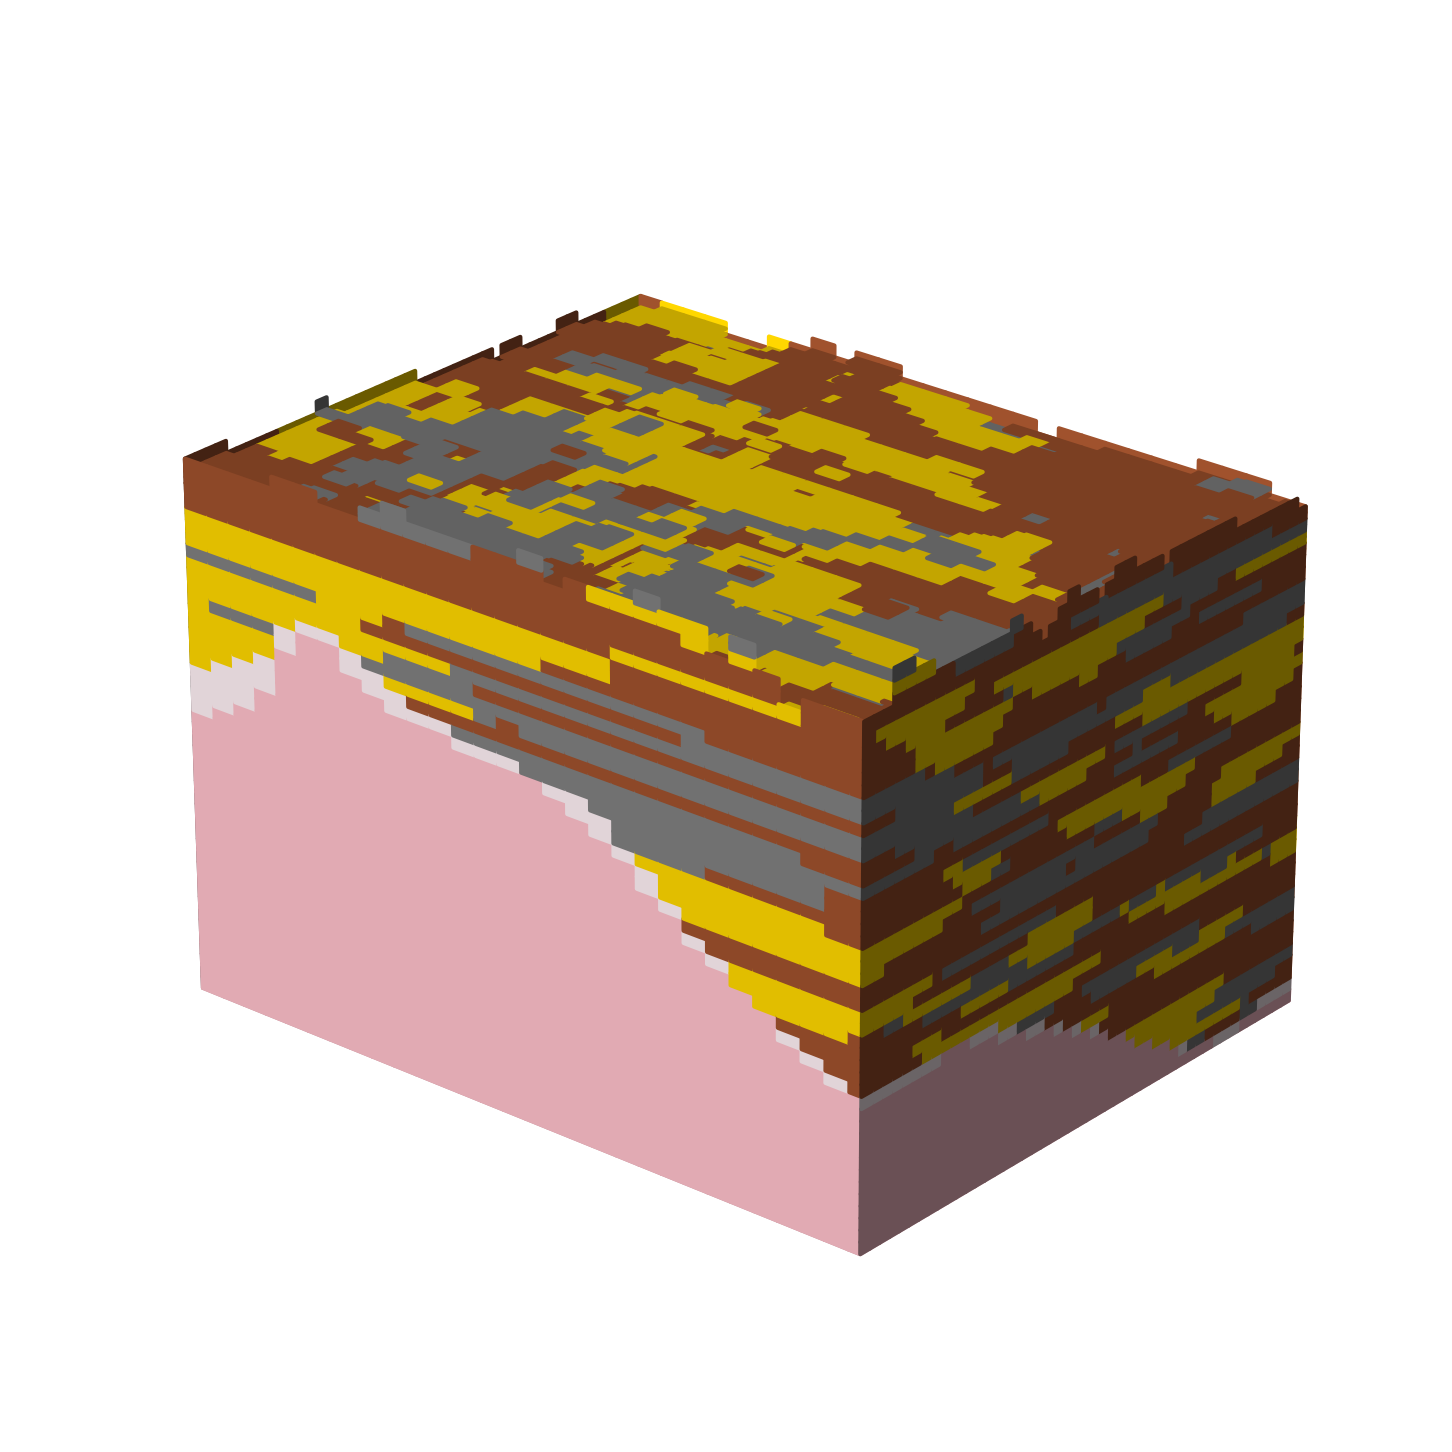

In [10]:
printtimelog('plotting 3D view only')
figFileName = figDir+'fig1_3Dmodel_facies'+filename_suffix+'_'+str(fgw)+'cm_ft'+str(fts)+'.png'
print(figFileName)
plot3Dreal(facies_mx,cmap,vx,vy,vz,labeltype='facies',axisOff=True,
           figsize=(fgw/2.54,fgw/15*12/2.54),fontsize=fts,figFileName=figFileName)

../data/models-age-facies/calibrated_model_real_1.npz
26-Feb-2025 (09:48:33) - plotting 3D view only
../figures/fig1_3Dmodel_facies_real_1_15cm_ft8.png


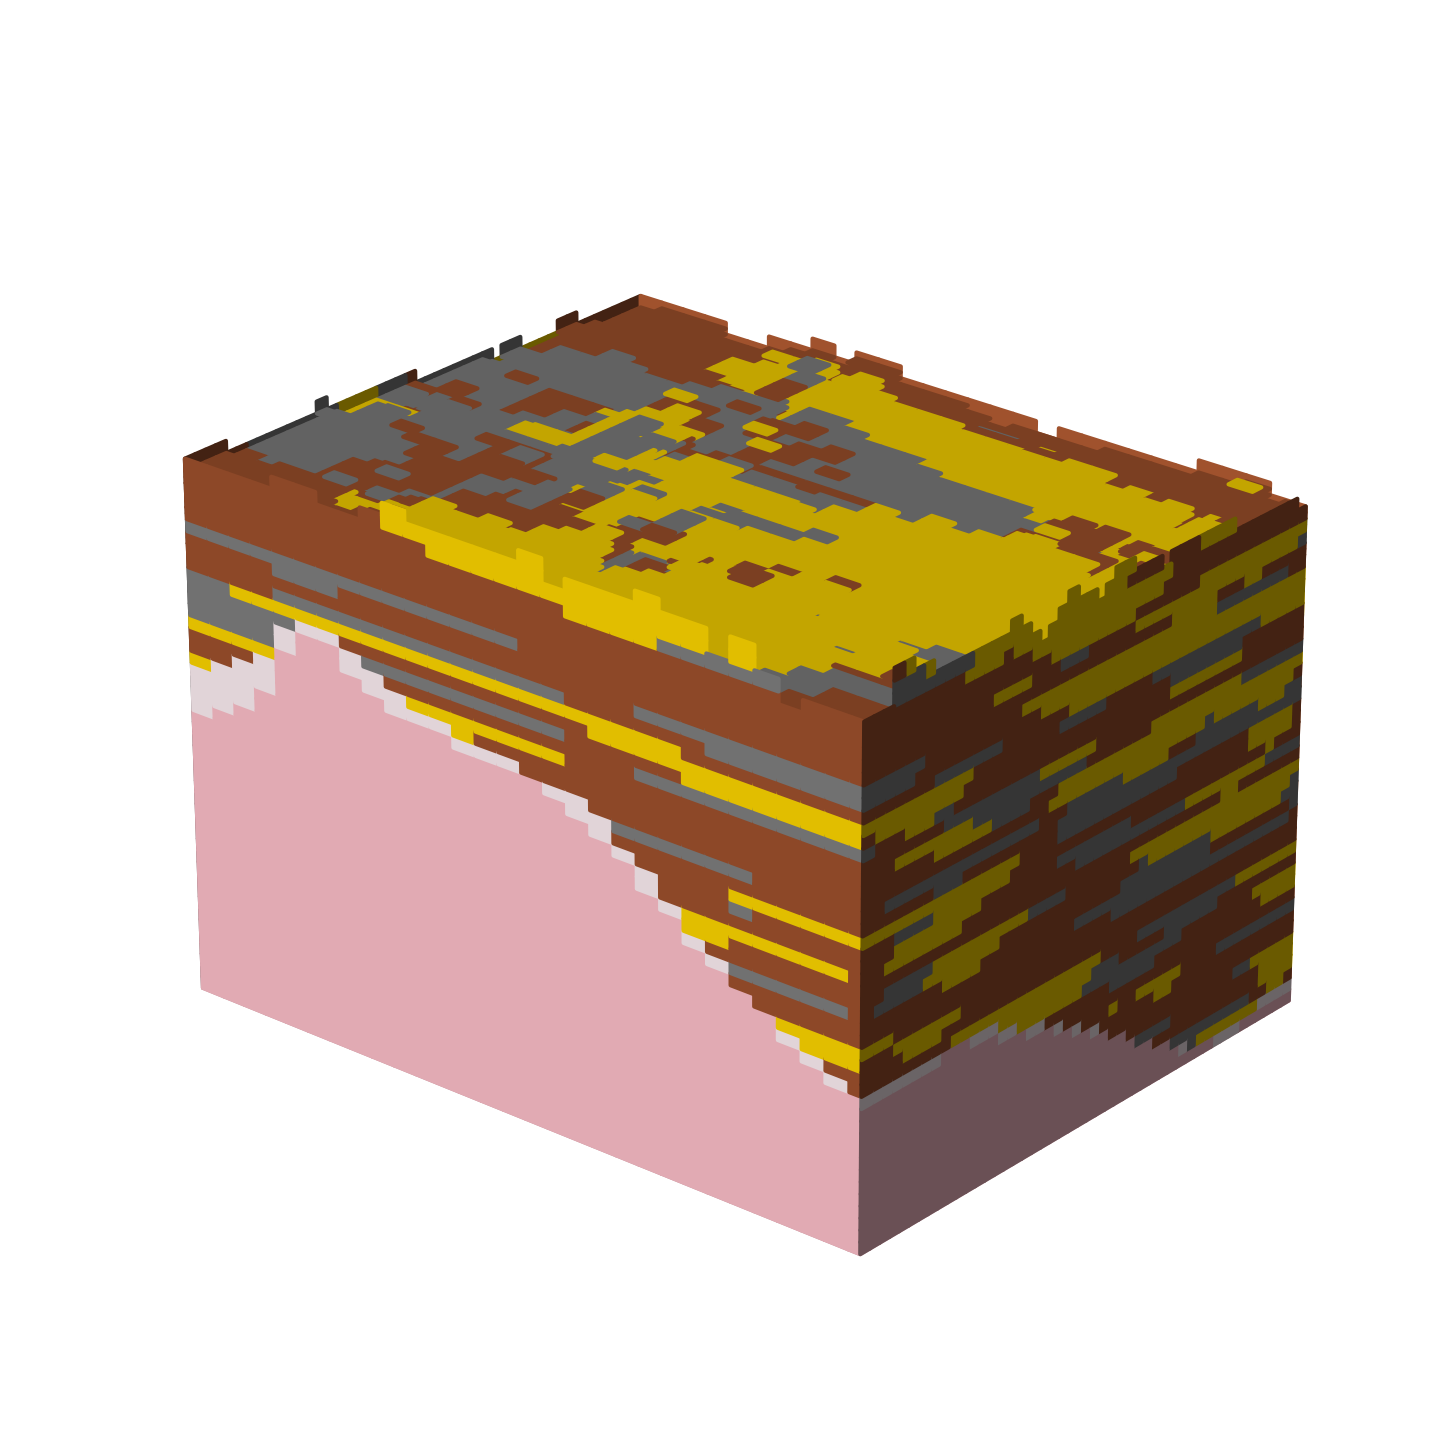

In [11]:
filename_suffix = '_real_1'
# SAVE NUMPY ARRAYS TO FILE
outfile = '../data/models-age-facies/calibrated_model'+filename_suffix+'.npz'
print(outfile)
npzfile = np.load(outfile)
# sorted(npzfile.files)
facies_mx = npzfile['facies_mx']

printtimelog('plotting 3D view only')
figFileName = figDir+'fig1_3Dmodel_facies'+filename_suffix+'_'+str(fgw)+'cm_ft'+str(fts)+'.png'
print(figFileName)
plot3Dreal(facies_mx,cmap,vx,vy,vz,labeltype='facies',axisOff=True,
           figsize=(fgw/2.54,fgw/15*12/2.54),fontsize=fts,figFileName=figFileName)

../data/models-age-facies/calibrated_model_real_2.npz
26-Feb-2025 (09:48:42) - plotting 3D view only
../figures/fig1_3Dmodel_facies_real_2_15cm_ft8.png


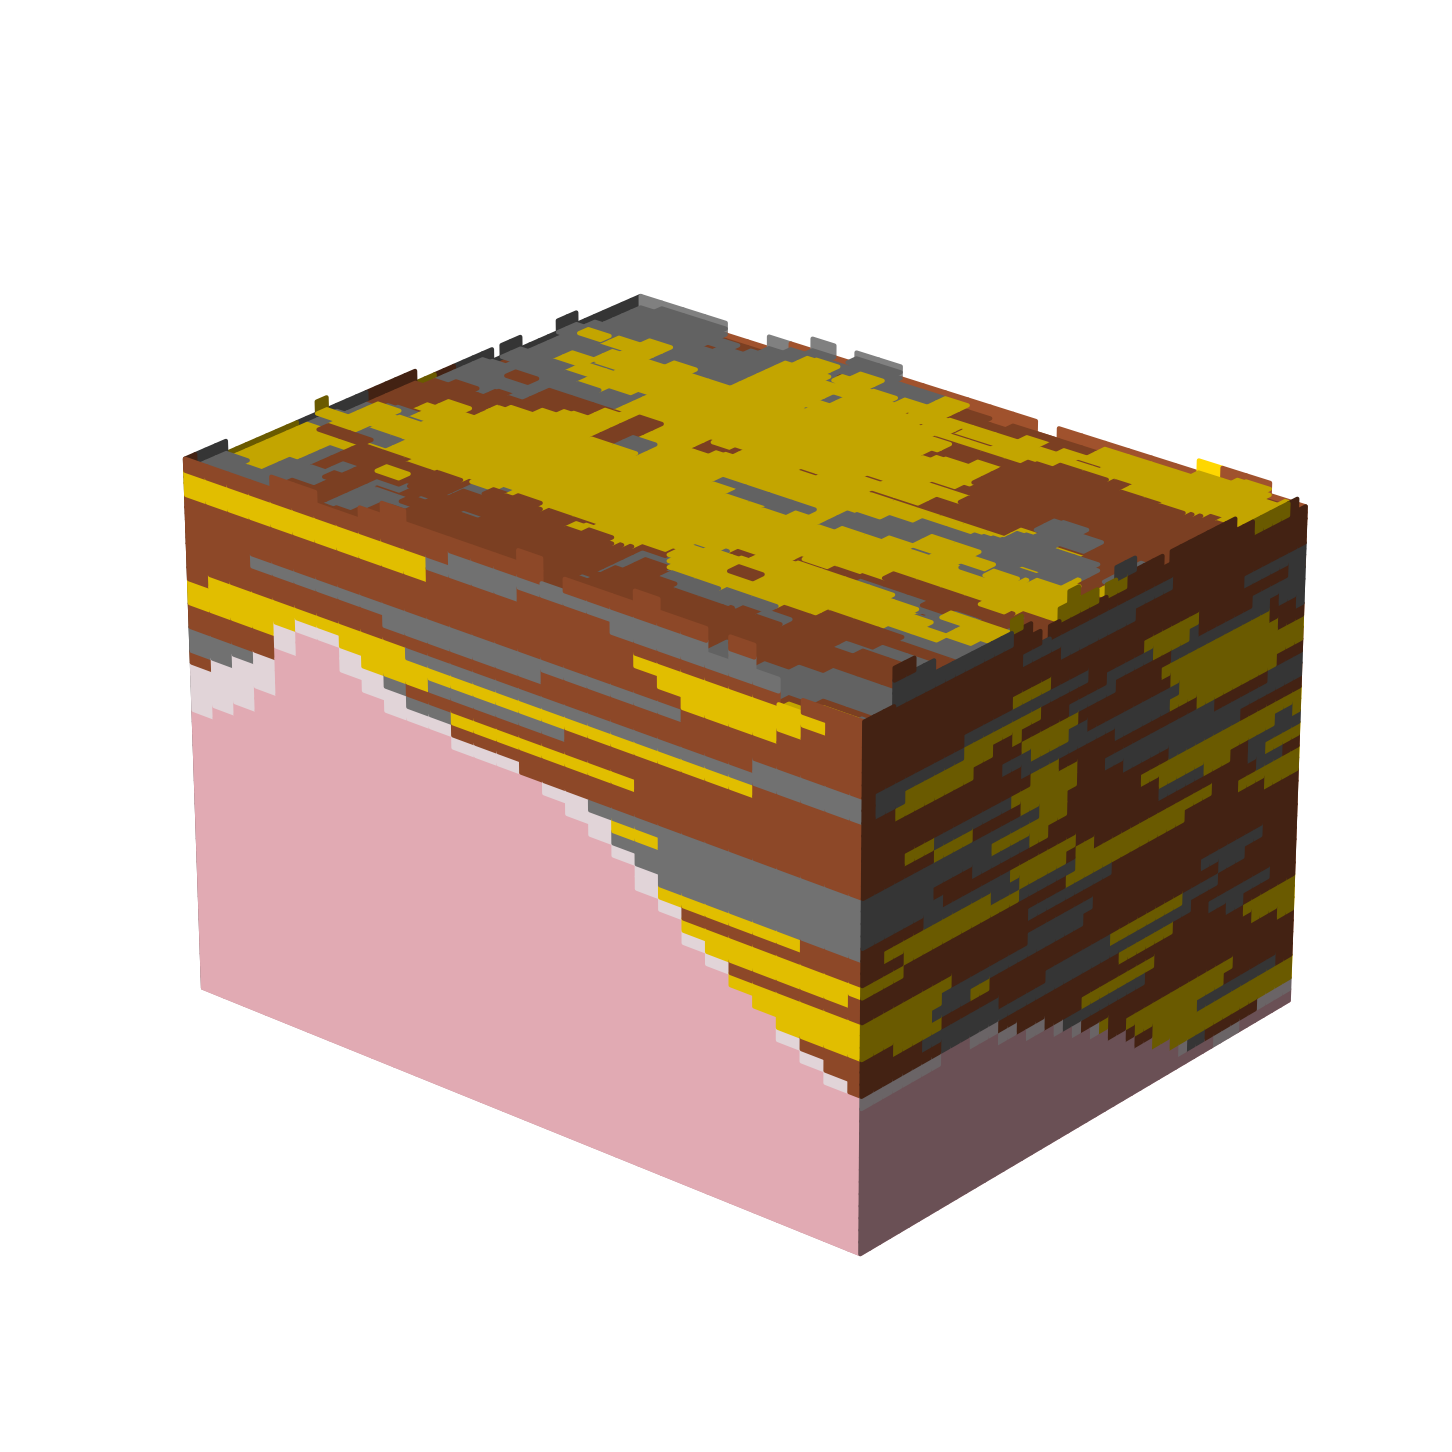

In [12]:
filename_suffix = '_real_2'
# SAVE NUMPY ARRAYS TO FILE
outfile = '../data/models-age-facies/calibrated_model'+filename_suffix+'.npz'
print(outfile)
npzfile = np.load(outfile)
# sorted(npzfile.files)
facies_mx = npzfile['facies_mx']

printtimelog('plotting 3D view only')
figFileName = figDir+'fig1_3Dmodel_facies'+filename_suffix+'_'+str(fgw)+'cm_ft'+str(fts)+'.png'
print(figFileName)
plot3Dreal(facies_mx,cmap,vx,vy,vz,labeltype='facies',axisOff=True,
           figsize=(fgw/2.54,fgw/15*12/2.54),fontsize=fts,figFileName=figFileName)

../figures/fig6_spatial_proportions_15cm_ft8.png


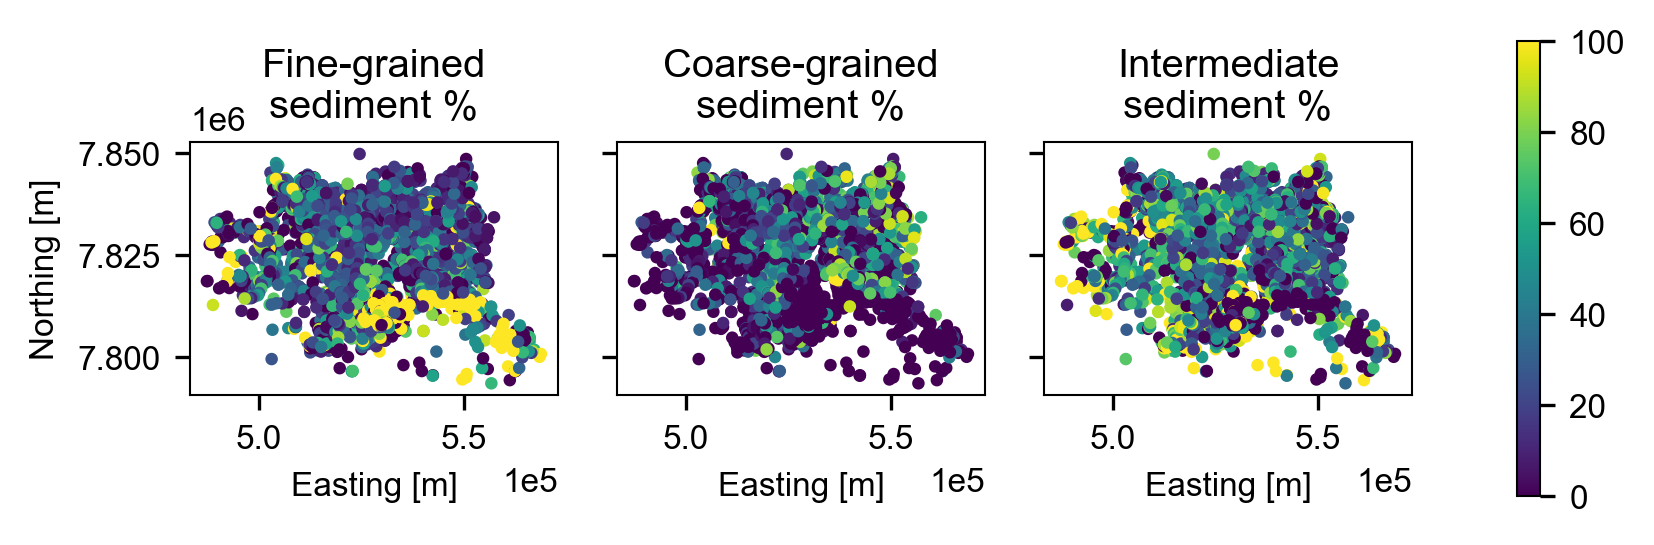

In [13]:
fontsize=fts
df_2D_prop = pd.read_csv(spatial_prop_fn)


figFileName = figDir+'fig6_spatial_proportions_'+str(fgw)+'cm_ft'+str(fts)+'.png'
print(figFileName)
plot_spatial_prop(df_2D_prop,figsize=(fgw/2.54,fgw/15*5/2.54),fontsize=fts,figFileName=figFileName)